# DECISION TREE ALGORITHM.

Decision tree algorithm is a type of supervised machine learning model that classifies data by using true or false values to questions. It one of the simplest and most accurate model that when visualised gives a hierachial tree structure with three types of nodes ; root, internal node and leafs. Its a graphical representation showing all possible solutions for a given problem based on a condition. 

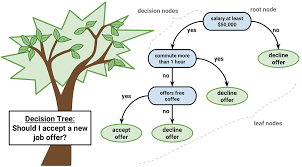

The **root node** sits at the top as a starting point as parent, it represents the whole dataset or population from which a decision will be made resulting to a split. The root is the most critical part as it sets the foundation for branching aimed at making separations that give birth to child nodes with the highest purity.  

**Decision/internal nodes** are decisions upon which datasets are split. They are test conducted based on the features of the dataset. A question is asked and then based on the answers provided, a tree is split further into sub-branches. A split is characterised by a feature that best separates the data according to certain criterion i.e informtaion gain(entropy), Gini Impurity, and variance reduction.

**Leaf Node** is a final ouput node that represent an outcome made. These terminal node represent a point upon which no further split in the dataset can be made, here the tree is considered as fully grown. For classification trees they represent classes while in regression thet represent contionous values often mean values of the target variable. 

**Feature selection** is an important step in decison trees where all possible splits are considered and one that result to best feature separation based on a criterion is selected. A decision node is split into subnodes also called child nodes. In classifiction data is separated into classes while in regression variance is reduced. 

Sometimes unneccessary branches can be removed by **pruning**. These are ones that have little to no impact on the accuracy of the model, this step improve the model generalisation abilities on new data and curbs overfitting.

Lets use this algorithm to predict voter turn out in the United States county election.  

In [42]:
# Import Required libraries. 
import pandas as pd 
import geopandas as gpd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Distance measurements 
from sklearn.neighbors import BallTree
from shapely.geometry import LineString

# Machine learning 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, classification_report


(3108, 88)


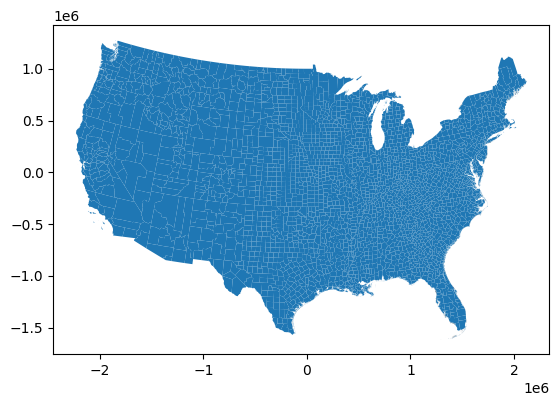

In [2]:
# Read and clean data.

# Read data containing county polygons. 
data = gpd.read_file('F:/Programs/Secrets of ML/Data/US_Elections.gpkg', layer='US_County_Elections_Projected')
data.plot()

print(data.shape)


In [3]:
# Rename columns 

data.rename(columns={'county_f_1': 'county_FIPS',
                     'pop_sqmi':'population_persqmile',
                     'totalvotes':'totalvotes_2008',
                     'totalvot_1':'totalvotes_2012',
                     'totalvot_2':'totalvotes_2016',
                     'totalvot_3':'totalvotes_2020',
                     'cvap_est_2':'cvap_est_2008',
                     'cvap_est_3':'cvap_est_2012',
                     'cvap_est_4':'cvap_est_2016',
                     'cvap_est_5':'cvap_est_2020',
                     'voter_turn':'voter_turnout_2008',
                     'voter_tu_1':'voter_turnout_2012',
                     'voter_tu_2':'voter_turnout_2016',
                     'voter_tu_3':'voter_turnout_2020',
                     'voter_tu_4':'voter_turnout_dem_2008',
                     'voter_tu_5':'voter_turnout_dem_2012',
                     'voter_tu_6':'voter_turnout_dem_2016',
                     'voter_tu_7':'voter_turnout_dem_2020',
                     'voter_tu_8':'voter_turnout_gop_2008',
                     'voter_tu_9':'voter_turnout_gop_2012',
                     'voter_t_10':'voter_turnout_gop_2016',
                     'voter_t_11':'voter_turnout_gop_2020',
                     'pctdiff_de':'per_diff_dem_vs_gop_2008',
                     'pctdiff__1':'per_diff_dem_vs_gop_2012',
                     'pctdiff__2':'per_diff_dem_vs_gop_2016',
                     'pctdiff__3':'per_diff_dem_vs_gop_2020',
                     'rawdiff_de':'rawdiff_dem_vs_gop_2008',
                     'rawdiff__1':'rawdiff_dem_vs_gop_2012',
                     'rawdiff__2':'rawdiff_dem_vs_gop_2016',
                     'rawdiff__3':'rawdiff_dem_vs_gop_2020',
                     'winning_pa':'winning_party_2008',
                     'winning__1':'winning_party_2008',
                     'winning__2':'winning_party_2008',
                     'winning__3':'winning_party_2008',
                     'gender_MED':'2022_median_age',
                     'householdi':'2022_per_capitalincome',
                     'educationa':'perc_2022_age_25+_no_diploma/highschool',
                     'households':'perc_2022_income_below_povertyline',
                     'educatio_1':'perc_2022_age_25+_with_bachelors_degree',
                     'disposable':'2022_avg_disposable_income',
                     'househol_1':'2022_average_houshold_income',
                     'financial1':'2022_avg_credit_card_debt'
                     },inplace=True)

print(data.columns)

Index(['county_fip', 'fips', 'name', 'population', 'population_persqmile',
       'sqmi', 'state_abbr', 'state_fips', 'state_name', 'county_FIPS',
       'totalvotes_2008', 'totalvotes_2012', 'totalvotes_2016',
       'totalvotes_2020', 'cvap_est_2008', 'cvap_est_2012', 'cvap_est_2016',
       'cvap_est_2020', 'voter_turnout_2008', 'voter_turnout_2012',
       'voter_turnout_2016', 'voter_turnout_2020', 'voter_turnout_dem_2008',
       'voter_turnout_dem_2012', 'voter_turnout_dem_2016',
       'voter_turnout_dem_2020', 'voter_turnout_gop_2008',
       'voter_turnout_gop_2012', 'voter_turnout_gop_2016',
       'voter_turnout_gop_2020', 'per_diff_dem_vs_gop_2008',
       'per_diff_dem_vs_gop_2012', 'per_diff_dem_vs_gop_2016',
       'per_diff_dem_vs_gop_2020', 'rawdiff_dem_vs_gop_2008',
       'rawdiff_dem_vs_gop_2012', 'rawdiff_dem_vs_gop_2016',
       'rawdiff_dem_vs_gop_2020', 'winning_party_2008', 'winning_party_2008',
       'winning_party_2008', 'winning_party_2008', 'aggregatio', 

### Model 1. 

In this model we will be using only three parameters , median age, income and percentage of voters with diploma certificates.
 


In [4]:
# Subset data, get recquired columns 

data1 = data[['2022_median_age', '2022_per_capitalincome', 'perc_2022_age_25+_no_diploma/highschool', 'voter_turnout_2020']]
data1

,2022_median_age,2022_per_capitalincome,perc_2022_age_25+_no_diploma/highschool,voter_turnout_2020
0,39.1,32233.0,7.53,0.632502
1,43.3,37891.0,5.77,0.627867
2,40.4,22826.0,16.10,0.535949
3,39.8,25152.0,12.53,0.542704
4,41.3,28176.0,9.49,0.632245
...,...,...,...,...
3103,35.5,37688.0,3.64,0.555581
3104,39.1,58009.0,1.93,0.855977
3105,35.9,32885.0,3.11,0.665892
3106,43.2,30448.0,4.82,0.672560


In [5]:
# Check missing values 

data1.isna().sum()

2022_median_age                            0
2022_per_capitalincome                     0
perc_2022_age_25+_no_diploma/highschool    0
voter_turnout_2020                         0
dtype: int64

In [6]:
# Define training features
X = data1.drop(columns='voter_turnout_2020')
print(f'Training features : \n {X.head()}')

# Define labels 
y = data1[['voter_turnout_2020']]
print(f'\n Labels : \n {y.head()}')

Training features : 
    2022_median_age  2022_per_capitalincome  \
0             39.1                 32233.0   
1             43.3                 37891.0   
2             40.4                 22826.0   
3             39.8                 25152.0   
4             41.3                 28176.0   

   perc_2022_age_25+_no_diploma/highschool  
0                                     7.53  
1                                     5.77  
2                                    16.10  
3                                    12.53  
4                                     9.49  

 Labels : 
    voter_turnout_2020
0            0.632502
1            0.627867
2            0.535949
3            0.542704
4            0.632245


In [7]:
# Fit a deciosion tree regressor to the dataset 

# Split the data into training(70%) and testing data(30%) ,pick random rows and sp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=6)
 
# Create a regressor object 
rg = DecisionTreeRegressor()

# Train the model, fit the model ,gain knowledge of the data 
rg.fit(X_train, y_train)

DecisionTreeRegressor()

In [8]:
# Predict values using test and train data 

y_pred1 = rg.predict(X_train)
y_pred = rg.predict(X_test)

In [9]:
# Evaluate the model using Mean Absolute Error. 
# This error calculates the difference between actual value and predicted values by averaging the distance between 
# each pair of values. 

t1 = mean_absolute_error(y_test, y_pred)
t2 = mean_absolute_error(y_train, y_pred1)

print(f'MAE of Decision Tree Regressor on test set : {t1}')
print(f'MAE of Decision Tree Regressor on train data : {t2}')

MAE of Decision Tree Regressor on test set : 0.07410096420394428
MAE of Decision Tree Regressor on train data : 0.0


The MAE on the training set is 0.000 meaning its overfitting, while the test set MAE is better(low MEA) meaning its generalising new data well. Lets apply pre-pruning to the tree by setting the maximum depth which limits the depth of trees and observe the outcome.

We expect a higher MEA on the training set while the test set improves.  

In [10]:
# Create a regressor object maximum tree depth of 11
rg2 = DecisionTreeRegressor(random_state=8, max_depth=11)

# Train the model, fit the model ,gain knowledge of the data 
rg2.fit(X_train, y_train)

# Predict values using test and train data 
y_pred1 = rg2.predict(X_train)
y_pred = rg2.predict(X_test)

# MEA
t3 = mean_absolute_error(y_test, y_pred)
t4 = mean_absolute_error(y_train, y_pred1)

print(f'MAE of Decision Tree Regressor on test set : {t3}')
print(f'MAE of Decision Tree Regressor on train data : {t4}')

MAE of Decision Tree Regressor on test set : 0.06228558534183752
MAE of Decision Tree Regressor on train data : 0.03025545760430417


Tree depth did not significantly impact MEA on test data but had minimal increase on training data illustrating that it slightly did not memorise data.  

### Feature Importance.

Lets evaluate the impact of each feature in the dataset, how did they contribute to the model. This value usually sums to 1. 0 means the feature was nit used at all while 1 means it perfectly predicted the target variable. 


In [11]:
print("Feature importances:\n{}".format(rg2.feature_importances_))

Feature importances:
[0.25924555 0.52055787 0.22019658]


The 'perc_2022_age_25+_no_diploma/highschool' and '2022_per_capitalincome' variables had the most importance meaning they were the most usefull in predicting voter turn out. 

### Tune Hyperparameters with GridSearchCV.

We can tune various parameters to find the optimal values for our model. Because there is no way of knowing in advance the best parameters, we have to give it a try with different values every time. This manual operation is very tiresome and time cobnsuming, and thats where GridSearchCV comes in handy. It automates this process by looping through the predefined parameters, fit our estimator and selects the best among them. 


In [12]:

parameters = {'max_depth':[6, 7, 8, 9, 10, 11, 12, 13, 14],
              'max_leaf_nodes': [28, 32, 36, 40, 44, 48, 52, 56, 60],
              'max_features':[10, 12, 14, 16, 18, 20, 22, 24, 26]}

# Split the data into training(70%) and testing data(30%) ,pick random rows and sp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=6)

rg3 = DecisionTreeRegressor()
rg3 = GridSearchCV(rg3, parameters)

# Train the model, fit the model ,gain knowledge of the data 
rg3.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'max_features': [10, 12, 14, 16, 18, 20, 22, 24, 26],
                         'max_leaf_nodes': [28, 32, 36, 40, 44, 48, 52, 56,
                                            60]})

In [13]:
# Get the best parameters 

rg3.best_params_

{'max_depth': 6, 'max_features': 14, 'max_leaf_nodes': 36}

In [14]:
# Predict values using test and train data 
y_pred1 = rg2.predict(X_train)
y_pred = rg2.predict(X_test)

# MEA
t5 = mean_absolute_error(y_test, y_pred)
t6 = mean_absolute_error(y_train, y_pred1)

print(f'MAE of Decision Tree Regressor on test set : {t5}')
print(f'MAE of Decision Tree Regressor on train data : {t6}')

MAE of Decision Tree Regressor on test set : 0.06228558534183752
MAE of Decision Tree Regressor on train data : 0.03025545760430417


### Model 2. 

Lets add more variables to our model. 



In [15]:
data2 = data[['2022_median_age', '2022_per_capitalincome', 'perc_2022_age_25+_no_diploma/highschool', 'voter_turnout_2020', 
               'population_persqmile', 'voter_turnout_2008', 'voter_turnout_2012', 'voter_turnout_2016',
                'perc_2022_income_below_povertyline', '2022_avg_credit_card_debt',
              'perc_2022_age_25+_with_bachelors_degree', '2022_avg_disposable_income', 'maritalsta',]]

# Data with geom will be used later
subset = data[['2022_median_age', '2022_per_capitalincome', 'fips', 'voter_turnout_2020', 'voter_turnout_2008',
                 'voter_turnout_2012', 'voter_turnout_2016', 'perc_2022_age_25+_with_bachelors_degree',
               '2022_avg_disposable_income', 'geometry']]

# Add 'state_abbr' column later and encode 


In [16]:
# Check missing values 

data2.isna().sum()

2022_median_age                            0
2022_per_capitalincome                     0
perc_2022_age_25+_no_diploma/highschool    0
voter_turnout_2020                         0
population_persqmile                       0
voter_turnout_2008                         0
voter_turnout_2012                         0
voter_turnout_2016                         0
perc_2022_income_below_povertyline         0
2022_avg_credit_card_debt                  0
perc_2022_age_25+_with_bachelors_degree    0
2022_avg_disposable_income                 0
maritalsta                                 0
dtype: int64

In [17]:
# Define training features
X = data2.drop(columns='voter_turnout_2020')
print(f'Training features : \n {X.head()}')

# Define labels 
y = data2[['voter_turnout_2020']]
print(f'\n Labels : \n {y.head()}')

Training features : 
    2022_median_age  2022_per_capitalincome  \
0             39.1                 32233.0   
1             43.3                 37891.0   
2             40.4                 22826.0   
3             39.8                 25152.0   
4             41.3                 28176.0   

   perc_2022_age_25+_no_diploma/highschool  population_persqmile  \
0                                     7.53                  97.3   
1                                     5.77                 141.9   
2                                    16.10                  27.9   
3                                    12.53                  35.6   
4                                     9.49                  90.9   

   voter_turnout_2008  voter_turnout_2012  voter_turnout_2016  \
0            0.621968            0.590258            0.604600   
1            0.622114            0.592132            0.598103   
2            0.556459            0.558418            0.523712   
3            0.500521           

In [18]:
print(data2.dtypes)

2022_median_age                            float64
2022_per_capitalincome                     float64
perc_2022_age_25+_no_diploma/highschool    float64
voter_turnout_2020                         float64
population_persqmile                       float64
voter_turnout_2008                         float64
voter_turnout_2012                         float64
voter_turnout_2016                         float64
perc_2022_income_below_povertyline         float64
2022_avg_credit_card_debt                  float64
perc_2022_age_25+_with_bachelors_degree    float64
2022_avg_disposable_income                 float64
maritalsta                                 float64
dtype: object


In [19]:
parameters = {'max_depth':[6, 7, 8, 9, 10, 11, 12, 13, 14],
              'max_leaf_nodes': [28, 32, 36, 40, 44, 48, 52, 56, 60],
              'max_features':[10, 12, 14, 16, 18, 20, 22, 24, 26]}

# Split the data into training(70%) and testing data(30%) ,pick random rows and sp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=6)

rg4 = DecisionTreeRegressor()
rg4 = GridSearchCV(rg4, parameters)

# Train the model, fit the model ,gain knowledge of the data 
rg4.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'max_features': [10, 12, 14, 16, 18, 20, 22, 24, 26],
                         'max_leaf_nodes': [28, 32, 36, 40, 44, 48, 52, 56,
                                            60]})

In [20]:
# Get the best parameters 
rg4.best_params_

{'max_depth': 6, 'max_features': 16, 'max_leaf_nodes': 44}

In [21]:
# Predict values using test and train data 
y_pred1 = rg4.predict(X_train)
y_pred = rg4.predict(X_test)

# MEA
t7 = mean_absolute_error(y_test, y_pred)
t8 = mean_absolute_error(y_train, y_pred1)

print(f'MAE of Decision Tree Regressor on test set : {t7}')
print(f'MAE of Decision Tree Regressor on train data : {t8}')

MAE of Decision Tree Regressor on test set : 0.030662928773724576
MAE of Decision Tree Regressor on train data : 0.026056765192363284


In [22]:
# R2 score

print(rg4.score(y_test, y_pred))  # Synonymous to classification report in classifications

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- voter_turnout_2020
Feature names seen at fit time, yet now missing:
- 2022_avg_credit_card_debt
- 2022_avg_disposable_income
- 2022_median_age
- 2022_per_capitalincome
- maritalsta
- ...


In [23]:
X.columns

Index(['2022_median_age', '2022_per_capitalincome',
       'perc_2022_age_25+_no_diploma/highschool', 'population_persqmile',
       'voter_turnout_2008', 'voter_turnout_2012', 'voter_turnout_2016',
       'perc_2022_income_below_povertyline', '2022_avg_credit_card_debt',
       'perc_2022_age_25+_with_bachelors_degree', '2022_avg_disposable_income',
       'maritalsta'],
      dtype='object')

In [24]:
rg4.best_estimator_.feature_importances_

array([0.00502694, 0.00831954, 0.00298038, 0.00817375, 0.        ,
       0.00676707, 0.94237609, 0.00539118, 0.00132132, 0.00693672,
       0.00453027, 0.00817675])

In [25]:
# Feature importance 

hd = list(X.columns)
for i, f in zip(hd, rg4.best_estimator_.feature_importances_):
     print(i,round(f*100,2))

2022_median_age 0.5
2022_per_capitalincome 0.83
perc_2022_age_25+_no_diploma/highschool 0.3
population_persqmile 0.82
voter_turnout_2008 0.0
voter_turnout_2012 0.68
voter_turnout_2016 94.24
perc_2022_income_below_povertyline 0.54
2022_avg_credit_card_debt 0.13
perc_2022_age_25+_with_bachelors_degree 0.69
2022_avg_disposable_income 0.45
maritalsta 0.82


In [26]:
# Feature importance 

features = pd.DataFrame(rg4.best_estimator_.feature_importances_, index=X.columns)
features

# # Plot bar chart
# sns.barplot(x = 'who',
#             y = 'fare',
#             data = features)

,0
2022_median_age,0.005027
2022_per_capitalincome,0.008320
perc_2022_age_25+_no_diploma/highschool,0.002980
population_persqmile,0.008174
voter_turnout_2008,0.000000
voter_turnout_2012,0.006767
voter_turnout_2016,0.942376
perc_2022_income_below_povertyline,0.005391
2022_avg_credit_card_debt,0.001321
perc_2022_age_25+_with_bachelors_degree,0.006937


In [27]:
features.columns 


RangeIndex(start=0, stop=1, step=1)

### Model 3.

In this model, we intend to add a distance variable that describes the urban and rural characteristics of a county to understand the effect it has on voter turnout. Cities in the US are classified based on population, i.e cities 10 are more populous than cities 6. We need to determine the distance between a county to each class of a city, rural counties are far flung while urban ones are closer to cities. 

C:\Users\Admin\AppData\Local\Temp\ipykernel_13272\3324530123.py:25: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(title = "Legend", fontsize="11") # Legend


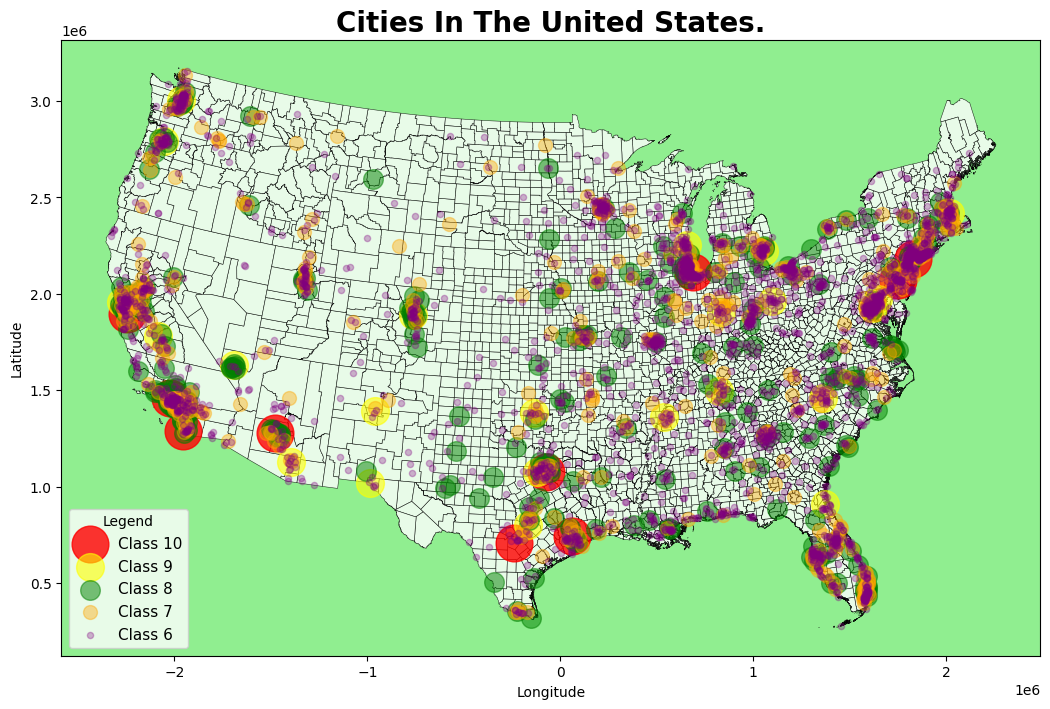

In [28]:
# Read cities data 

cities_10 = gpd.read_file("F:/MOOC's/ESRI MOOC/ESRI  MOOC Training 1/Wk 1 Task 2 Data Visualization/Data Export/Cities/Exportdata/city_pop_cls_10.shp")
cities_9 = gpd.read_file("F:/MOOC's/ESRI MOOC/ESRI  MOOC Training 1/Wk 1 Task 2 Data Visualization/Data Export/Cities/Exportdata/city_pop_cls_9.shp")
cities_8 = gpd.read_file("F:/MOOC's/ESRI MOOC/ESRI  MOOC Training 1/Wk 1 Task 2 Data Visualization/Data Export/Cities/Exportdata/city_pop_cls_8.shp")
cities_7 = gpd.read_file("F:/MOOC's/ESRI MOOC/ESRI  MOOC Training 1/Wk 1 Task 2 Data Visualization/Data Export/Cities/Exportdata/city_pop_cls_7.shp")
cities_6 = gpd.read_file("F:/MOOC's/ESRI MOOC/ESRI  MOOC Training 1/Wk 1 Task 2 Data Visualization/Data Export/Cities/Exportdata/city_pop_cls_6.shp")

# Reproject to projected crs(metric), uses meters 
polygon = subset.to_crs(epsg=5069)
cities_10 = cities_10.to_crs(epsg=5069)
cities_9 = cities_9.to_crs(epsg=5069)
cities_8 = cities_8.to_crs(epsg=5069)
cities_7 = cities_7.to_crs(epsg=5069)
cities_6 = cities_6.to_crs(epsg=5069)

fig, ax = plt.subplots(figsize=(14, 8))
polygon.plot(ax=ax, color='white', edgecolor='black', linewidth=0.4, alpha=0.8, label='County')
cities_10.plot(ax=ax, marker='o', color='red', markersize = 700, alpha=0.8, label='Class 10')
cities_9.plot(ax=ax, marker='o', color='yellow', markersize=400, alpha=0.6, label='Class 9')
cities_8.plot(ax=ax, marker='o', color='green', markersize=200, alpha=0.5, label='Class 8')
cities_7.plot(ax=ax, marker='o', color='orange', markersize=100, alpha=0.4, label='Class 7')
cities_6.plot(ax=ax, marker='o', color='purple', markersize=20, alpha=0.3, label='Class 6')

plt.legend(title = "Legend", fontsize="11") # Legend
plt.title("Cities In The United States.", fontsize=20, fontweight='bold')  # Title 
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#ax.figure(facecolor='lightblue')  # Bacground colour of figure 
plt.gca().set_facecolor('lightgreen')  # Background colour of plot area
plt.show()

Find the closest city to each polygon in all the classes then find the distance. All geopandas operaiona are planar, meaning the do not have a third dimension and use projected coordinate systeme that uses meters as units. Geographic system results in errors since it uses a cartesian coordinate that is suited for angular distances. 


In [29]:
# Lets design a function that takes in a city layer, polygon and class then generates the distance between them.
# Counties that intersect with cities have distance 0

def closest_city(counties, cities, size):

    # Perform a nearest join , find the closest city to each polygon, include distance column 
    # Output is an union of both layers with and added distance column.
    # N\B - the geometry of the second layer, in this case points, is not included
    # When a layer intersects with a point distance will be 0
    cities_w_counties = gpd.sjoin_nearest(counties, cities, distance_col="distances")

    # Divide distances by 1000 to get km units
    cities_w_counties.distances = cities_w_counties.distances / 1000

    # Filter columns , get geometry column of counties and the distance to nearest city
    # Also unique columns to identify both county(fips) and city(placefips) 
    cities_w_counties = cities_w_counties[['fips', 'geometry', 'PLACEFIPS', 'distances']]


    #------------------------------------------------------------------------
    # --------------      Merge operation     -------------------------------
    #------------------------------------------------------------------------
   
    # Get the geometry of the second layer with an inner join with points layer
    merged = pd.merge(cities_w_counties, cities, how="inner", on=["PLACEFIPS", "PLACEFIPS"])

    # Filter columns, remove all columns from point layer except geometry and distance of point
    # Geometry of polygon layer is removed to prevent complications during merging of data later 
    merged = merged[['fips', 'PLACEFIPS', 'geometry_y', 'distances']] 

    # Rename columns 
    merged.rename(columns={'geometry_x':'geometry_polygon'}, inplace=True)

    # Rename distance column
    if size == 10 :
        merged.rename(columns={'distances':'distances_10', 
                               'geometry_y':'geometry_point_10',
                               'PLACEFIPS':'PLACEFIPS_10'}, inplace=True)
    elif size == 9:
        merged.rename(columns={'distances':'distances_9', 
                               'geometry_y':'geometry_point_9',
                               'PLACEFIPS':'PLACEFIPS_9'}, inplace=True)
    elif size == 8:
        merged.rename(columns={'distances':'distances_8', 
                               'geometry_y':'geometry_point_8',
                               'PLACEFIPS':'PLACEFIPS_8'}, inplace=True)
    elif size == 7:
        merged.rename(columns={'distances':'distances_7', 
                               'geometry_y':'geometry_point_7',
                               'PLACEFIPS':'PLACEFIPS_7'}, inplace=True)
    else :
        merged.rename(columns={'distances':'distances_6', 
                               'geometry_y':'geometry_point_6',
                               'PLACEFIPS':'PLACEFIPS_6'}, inplace=True)


    # Return two tables, one with distance only and another with both geoms and distance 
    return cities_w_counties, merged


# Call function passing county layer, city points, and city class, then assign values to variables 
county_dist_10, merged_geom_10 = closest_city(polygon, cities_10, 10)
county_dist_9, merged_geom_9 = closest_city(polygon, cities_9, 9)
county_dist_8, merged_geom_8 = closest_city(polygon, cities_8, 8)
county_dist_7, merged_geom_7 = closest_city(polygon, cities_7, 7)
county_dist_6, merged_geom_6 = closest_city(polygon, cities_6, 6)

In [30]:
# Table with distance and polygon geom 

print(f'Table of polygon with distances : \n {county_dist_10.head(2)} \n\n')
print(f'colums : {county_dist_10.columns}')

Table of polygon with distances : 
     fips                                           geometry PLACEFIPS  \
0  01001  MULTIPOLYGON (((892123.045 1115620.999, 892462...   4835000   
1  01003  MULTIPOLYGON (((813031.992 840007.836, 813055....   4835000   

    distances  
0  861.072768  
1  709.058633   


colums : Index(['fips', 'geometry', 'PLACEFIPS', 'distances'], dtype='object')


In [37]:
# Table with point geom and distance 

print(f'Table of Polygon with point geom : \n {merged_geom_10.head(2)}')
print(f'\n\n colums : {merged_geom_10.columns}')

Table of Polygon with point geom : 
     fips PLACEFIPS_10             geometry_point_10  distances_10
0  01001      4835000  POINT (61163.317 742758.864)    861.072768
1  01003      4835000  POINT (61163.317 742758.864)    709.058633


 colums : Index(['fips', 'PLACEFIPS_10', 'geometry_point_10', 'distances_10'], dtype='object')


In [38]:
# subset data columns 

print(f'Table of Polygon with point geom : \n {polygon.columns}')


Table of Polygon with point geom : 
 Index(['2022_median_age', '2022_per_capitalincome', 'fips',
       'voter_turnout_2020', 'voter_turnout_2008', 'voter_turnout_2012',
       'voter_turnout_2016', 'perc_2022_age_25+_with_bachelors_degree',
       '2022_avg_disposable_income', 'geometry', 'poly_centroid'],
      dtype='object')


In [39]:
# Calculate centroid of polygons that will be used to plot a line to closest city 

polygon['poly_centroid'] = polygon.centroid
polygon.columns

Index(['2022_median_age', '2022_per_capitalincome', 'fips',
       'voter_turnout_2020', 'voter_turnout_2008', 'voter_turnout_2012',
       'voter_turnout_2016', 'perc_2022_age_25+_with_bachelors_degree',
       '2022_avg_disposable_income', 'geometry', 'poly_centroid'],
      dtype='object')

In [40]:
# Merge data from all classes of cities into a single table using chain operation 

data3 = polygon.merge(merged_geom_10, on='fips', how='inner')\
        .merge(merged_geom_9, on='fips', how='inner')\
        .merge(merged_geom_8, on='fips', how='inner')\
        .merge(merged_geom_7, on='fips', how='inner')\
        .merge(merged_geom_6, on='fips', how='inner')
print(data3.head(2))

print(f'\n\n columns {data3.columns}')



   2022_median_age  2022_per_capitalincome   fips  voter_turnout_2020  \
0             39.1                 32233.0  01001            0.632502   
1             43.3                 37891.0  01003            0.627867   

   voter_turnout_2008  voter_turnout_2012  voter_turnout_2016  \
0            0.621968            0.590258            0.604600   
1            0.622114            0.592132            0.598103   

   perc_2022_age_25+_with_bachelors_degree  2022_avg_disposable_income  \
0                                    17.39                     66149.0   
1                                    22.58                     70900.0   

                                            geometry  ... distances_9  \
0  MULTIPOLYGON (((892123.045 1115620.999, 892462...  ...  386.960995   
1  MULTIPOLYGON (((813031.992 840007.836, 813055....  ...  474.239792   

  PLACEFIPS_8                geometry_point_8  distances_8 PLACEFIPS_7  \
0     0151000  POINT (906043.440 1080103.540)    10.702483     0135

In [44]:
# Create line string between centroid of polygon to the closest city

# Create a link (LineString) between polygon and closest class 10 city
data3['link'] = data3.apply(lambda row: LineString([row['poly_centroid'], row['geometry_point_10']]), axis=1)

# Set link as the active geometry
data3_links = data3.copy()
data3_links = data3_links.set_geometry('link')

In [46]:
# Plot the connecting links between counties and cities and color them based on distance
ax = data3_links.plot(column='distances_10', cmap='Greens', alpha=0.8, lw=0.7, figsize=(13, 10))
ax = data3.plot(ax=ax, color='yellow', markersize=1, alpha=0.7)
ax = merged_geom_10.plot(ax=ax, markersize=4, marker='o', color='red', alpha=0.9, zorder=3)

# Zoom closer
ax.set_xlim([24.99, 25.01])
ax.set_ylim([60.26, 60.275])

# Set map background color to black, which helps with contrast
ax.set_facecolor('black')

#### References 

1. Find nearest point to layer - https://autogis-site.readthedocs.io/en/2019/notebooks/L3/nearest-neighbor-faster.html

2. Create custom points in matplotlib based on population - https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html

3. Create link between geometry and point and plot - https://autogis-site.readthedocs.io/en/2019/notebooks/L3/nearest-neighbor-faster.html